In [2]:
import sys

sys.path.append("../../")
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "d:\python\python.exe"
  * The NumPy version is: "1.25.0"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: No module named 'numpy.core._multiarray_umath'


In [ ]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

### 연습문제 1-1

  - 문제를 다항선형회귀 분석으로 재현하고 설명력과 에러율을 표시하라.

  - 훈련데이터와 검정 데이터에 대한 관측치와 에측치에 대한 시각화를 제시하라

### 문제 1

#### 데이터 불러오기

In [ ]:
df = read_excel(r"C:\Users\User\MDblue\Bigdata\수업내용\F_데이터_마이닝\02_Sklearn\beans.xlsx")
df.head()

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31


In [ ]:
poly = PolynomialFeatures(include_bias=False)
fit = poly.fit_transform(df[['수분함유량']])
fit

array([[  36., 1296.],
       [  40., 1600.],
       [  34., 1156.],
       [  44., 1936.],
       [  33., 1089.],
       [  36., 1296.],
       [  40., 1600.],
       [  33., 1089.],
       [  26.,  676.],
       [  36., 1296.]])

In [ ]:
poly.get_feature_names_out()

array(['수분함유량', '수분함유량^2'], dtype=object)

In [ ]:
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,수분함유량,수분함유량^2
0,36.0,1296.0
1,40.0,1600.0
2,34.0,1156.0
3,44.0,1936.0
4,33.0,1089.0


In [ ]:
y = df[['강도']]
y.head()

,강도
0,29
1,32
2,29
3,40
4,31


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7, 2), (3, 2), (7, 1), (3, 1))

In [ ]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[-2.05422407  0.04045876]]
절편:  [51.29936854]
훈련 데이터 설명력:  0.948987598169573
검증 데이터 설명력:  -8.143084034528927


In [ ]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([29.78185993, 25.23966705, 39.24167623, 33.86442786, 33.86442786,
       29.78185993, 28.22608113])

In [ ]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([27.56956803, 29.78185993, 27.56956803])

In [ ]:
olsResult = helper.ml_ols(df, xnames='수분함유량', yname='강도', degree=2, test_size=0.3, random_state=123)

print("계수: ", olsResult.coef)
print("절편: ", olsResult.intercept)

계수:  [[-2.05422407  0.04045876]]
절편:  [51.29936854]


In [ ]:
print("R^2: ", olsResult.trainRegMetric.r2)
print("MAE: ", olsResult.trainRegMetric.mae)
print("MSE: ", olsResult.trainRegMetric.mse)
print("RMSE: ", olsResult.trainRegMetric.rmse)
print("MAPE: ", olsResult.trainRegMetric.mape)
print("MPE: ", olsResult.trainRegMetric.mpe)

R^2:  0.948987598169573
MAE:  0.8245585260510643
MSE:  0.9744409819036656
RMSE:  0.9871377725037501
MAPE:  2.624827833276785
MPE:  -0.08405044961718751


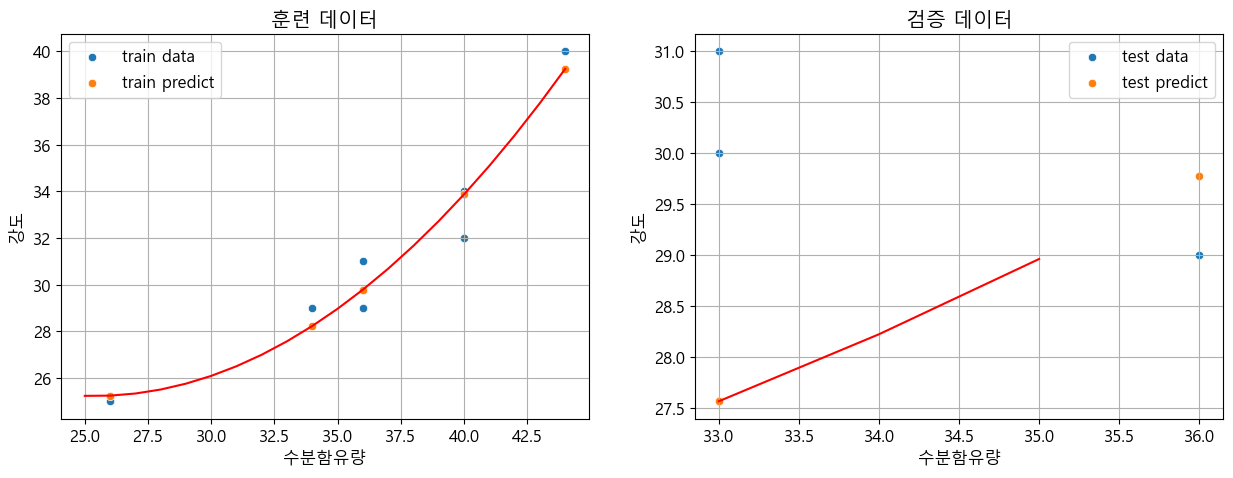

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['수분함유량'], y=y_train['강도'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['수분함유량'], y=y_train_pred, label='train predict', ax=ax1)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)
# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()


# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['수분함유량'], y=y_test['강도'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['수분함유량'], y=y_test_pred, label='test predict', ax=ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

#### 문제2

In [ ]:
af = read_excel(r"C:\Users\User\MDblue\Bigdata\수업내용\F_데이터_마이닝\02_Sklearn\aircon.xlsx")
af.head()

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50


In [ ]:
poly = PolynomialFeatures(include_bias=False)
fit = poly.fit_transform(af[['예약대수']])
fit

array([[  19.,  361.],
       [  23.,  529.],
       [  26.,  676.],
       [  29.,  841.],
       [  30.,  900.],
       [  38., 1444.],
       [  39., 1521.],
       [  46., 2116.],
       [  49., 2401.],
       [  58., 3364.]])

In [ ]:
poly.get_feature_names_out()

array(['예약대수', '예약대수^2'], dtype=object)

In [ ]:
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,예약대수,예약대수^2
0,19.0,361.0
1,23.0,529.0
2,26.0,676.0
3,29.0,841.0
4,30.0,900.0


In [ ]:
y = af[['판매대수']]
y.head()

,판매대수
0,33
1,51
2,40
3,49
4,50


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7, 2), (3, 2), (7, 1), (3, 1))

In [ ]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[ 1.72732907e+00 -1.10258345e-03]]
절편:  [3.61731765]
훈련 데이터 설명력:  0.9418315846138151
검증 데이터 설명력:  0.3583742568809699


In [ ]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([ 67.66369172,  85.6091391 ,  52.78258793,  42.76261956,
        69.30612186, 100.09331284,  47.782527  ])

In [ ]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([54.44486457, 36.03853731, 80.74138818])

In [ ]:
olsResult = helper.ml_ols(af, xnames='예약대수', yname='판매대수', degree=2, test_size=0.3, random_state=123)

print("계수: ", olsResult.coef)
print("절편: ", olsResult.intercept)

계수:  [[ 1.72732907e+00 -1.10258345e-03]]
절편:  [3.61731765]


In [ ]:
print("R^2: ", olsResult.trainRegMetric.r2)
print("MAE: ", olsResult.trainRegMetric.mae)
print("MSE: ", olsResult.trainRegMetric.mse)
print("RMSE: ", olsResult.trainRegMetric.rmse)
print("MAPE: ", olsResult.trainRegMetric.mape)
print("MPE: ", olsResult.trainRegMetric.mpe)

R^2:  0.9418315846138151
MAE:  3.902407933472026
MSE:  22.982459630133462
RMSE:  4.794002464552293
MAPE:  7.457361969614873
MPE:  -0.9174718034904255


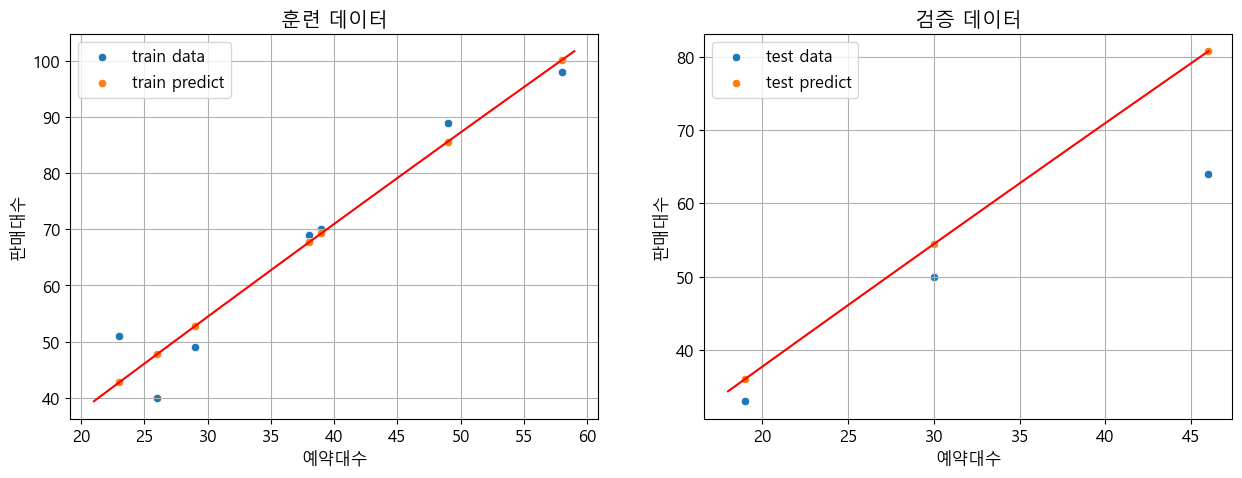

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['예약대수'], y=y_train['판매대수'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['예약대수'], y=y_train_pred, label='train predict', ax=ax1)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)
# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()


# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['예약대수'], y=y_test['판매대수'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['예약대수'], y=y_test_pred, label='test predict', ax=ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

#### 문제 3

In [ ]:
gf = read_excel(r"C:\Users\User\MDblue\Bigdata\수업내용\F_데이터_마이닝\02_Sklearn\galton.xlsx")
gf.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [ ]:
poly = PolynomialFeatures(include_bias=False)
fit = poly.fit_transform(gf[['child']])
fit

array([[  61.7 , 3806.89],
       [  61.7 , 3806.89],
       [  61.7 , 3806.89],
       ...,
       [  73.7 , 5431.69],
       [  73.7 , 5431.69],
       [  73.7 , 5431.69]])

In [ ]:
poly.get_feature_names_out()

array(['child', 'child^2'], dtype=object)

In [ ]:
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,child,child^2
0,61.7,3806.89
1,61.7,3806.89
2,61.7,3806.89
3,61.7,3806.89
4,61.7,3806.89


In [ ]:
y = gf[['parent']]
y.head()

,parent
0,70.5
1,68.5
2,65.5
3,64.5
4,64.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((649, 2), (279, 2), (649, 1), (279, 1))

In [ ]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[-3.48039782  0.027865  ]]
절편:  [175.93072629]
훈련 데이터 설명력:  0.22246696222331142
검증 데이터 설명력:  0.21718128480014565


In [ ]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([69.38633414, 67.46400716, 67.25519861, 67.64507001, 69.38633414,
       68.5226385 , 67.33867432, 67.33867432, 68.5226385 , 68.92662132,
       68.17438567, 69.38633414, 67.46400716, 69.90177695, 69.38633414,
       68.92662132, 68.5226385 , 67.46400716, 68.17438567, 68.5226385 ,
       68.5226385 , 69.90177695, 67.46400716, 68.92662132, 68.17438567,
       69.90177695, 67.88186284, 68.92662132, 67.88186284, 67.26907147,
       67.64507001, 67.88186284, 68.17438567, 68.92662132, 68.17438567,
       67.64507001, 67.46400716, 68.17438567, 68.92662132, 67.64507001,
       67.88186284, 67.88186284, 68.17438567, 67.26907147, 68.17438567,
       69.90177695, 67.64507001, 67.64507001, 67.88186284, 67.64507001,
       68.17438567, 68.17438567, 67.26907147, 68.5226385 , 68.17438567,
       67.88186284, 69.38633414, 68.5226385 , 68.17438567, 67.64507001,
       67.88186284, 67.46400716, 67.88186284, 67.46400716, 68.17438567,
       68.92662132, 67.33867432, 69.90177695, 68.17438567, 68.92

In [ ]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([68.5226385 , 69.38633414, 67.64507001, 67.25519861, 68.5226385 ,
       68.17438567, 68.92662132, 67.88186284, 67.33867432, 67.64507001,
       69.38633414, 68.92662132, 67.64507001, 67.88186284, 70.47294975,
       67.88186284, 69.38633414, 67.64507001, 67.88186284, 68.5226385 ,
       67.88186284, 67.88186284, 68.92662132, 68.17438567, 68.5226385 ,
       69.38633414, 68.17438567, 68.5226385 , 67.88186284, 69.38633414,
       69.90177695, 68.5226385 , 68.5226385 , 68.92662132, 67.88186284,
       68.5226385 , 67.88186284, 67.46400716, 67.64507001, 69.38633414,
       68.5226385 , 67.64507001, 69.90177695, 68.17438567, 67.64507001,
       67.64507001, 69.38633414, 68.92662132, 68.5226385 , 67.46400716,
       67.25519861, 68.5226385 , 67.88186284, 68.5226385 , 67.46400716,
       67.26907147, 67.88186284, 67.88186284, 67.46400716, 67.64507001,
       68.5226385 , 68.5226385 , 69.38633414, 68.5226385 , 68.17438567,
       69.38633414, 67.64507001, 68.5226385 , 69.38633414, 68.17

In [ ]:
olsResult = helper.ml_ols(gf, xnames='child', yname='parent', degree=2, test_size=0.3, random_state=123)

print("계수: ", olsResult.coef)
print("절편: ", olsResult.intercept)

계수:  [[-3.48039782  0.027865  ]]
절편:  [175.93072629]


In [ ]:
print("R^2: ", olsResult.trainRegMetric.r2)
print("MAE: ", olsResult.trainRegMetric.mae)
print("MSE: ", olsResult.trainRegMetric.mse)
print("RMSE: ", olsResult.trainRegMetric.rmse)
print("MAPE: ", olsResult.trainRegMetric.mape)
print("MPE: ", olsResult.trainRegMetric.mpe)

R^2:  0.22246696222331142
MAE:  1.187658618442967
MSE:  2.2561658773473785
RMSE:  1.5020538862994823
MAPE:  1.7431281209805085
MPE:  -0.048623624454407016


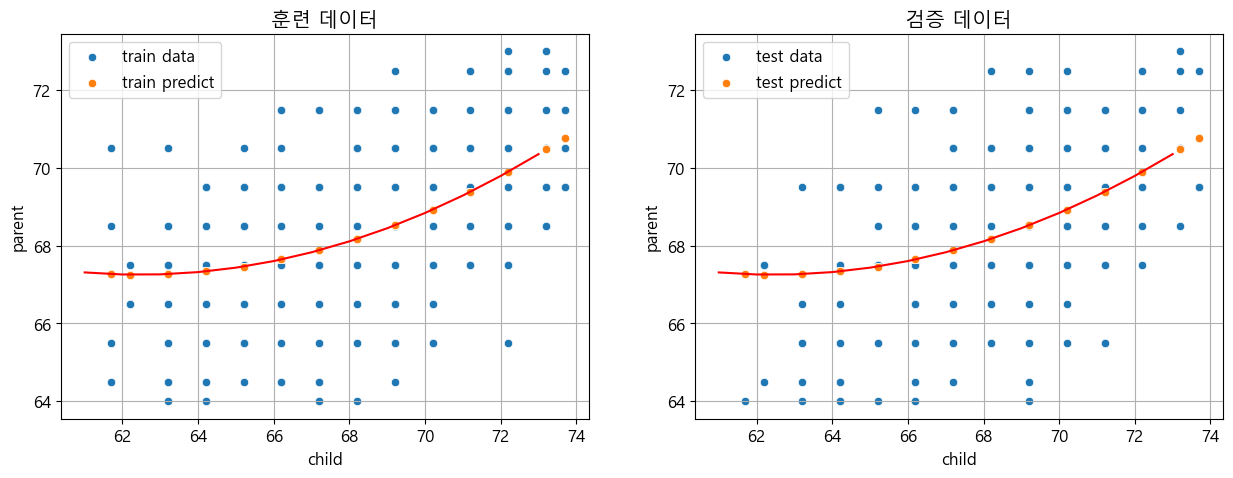

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['child'], y=y_train['parent'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['child'], y=y_train_pred, label='train predict', ax=ax1)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)
# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()


# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['child'], y=y_test['parent'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['child'], y=y_test_pred, label='test predict', ax=ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

### 연습문제 1-2

  - 다항 선형회귀 분석을 수행하라.
  - 범주형 변수가 있다면 통제요인으로 설정하여 더미 변수로 추가하라.
  - 훈련데이터와 검정데이터에 대한 관측치와 예측치에 대한 시각화를 제시하라.

#### 문제 1

In [ ]:
hf = read_excel(r"C:\Users\User\MDblue\Bigdata\수업내용\F_데이터_마이닝\02_Sklearn\diabetes.xlsx")
hf.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
fit = poly.fit_transform(hf[['age', 'sex', 'bmi','bp','s1','s2','s3','s4','s5','s6']])
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s3^2,s3 s4,s3 s5,s3 s6,s4^2,s4 s5,s4 s6,s5^2,s5 s6,s6^2
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,...,0.001884,0.000113,-0.000864,0.000766,0.000007,-0.000052,0.000046,0.000396,-0.000351,0.000311
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,...,0.005537,-0.002939,-0.005085,-0.006861,0.001560,0.002699,0.003641,0.004669,0.006300,0.008502
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,...,0.001047,0.000084,-0.000093,0.000839,0.000007,-0.000007,0.000067,0.000008,-0.000074,0.000672
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,...,0.001299,-0.001236,-0.000818,0.000337,0.001177,0.000778,-0.000321,0.000515,-0.000212,0.000088
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,...,0.000066,-0.000021,-0.000260,-0.000380,0.000007,0.000083,0.000121,0.001023,0.001492,0.002175


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, hf[['target']], test_size=0.3, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((309, 65), (133, 65), (309, 1), (133, 1))

In [ ]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[ 1.67148165e+01 -2.89615608e+02  3.76629986e+02  3.29585848e+02
  -3.97234494e+04  3.47029624e+04  1.46140715e+04  2.62800166e+02
   1.36637890e+04  8.67833010e+01  1.28265924e+03  4.40594717e+03
  -1.03942230e+03  5.01364967e+02 -1.28267528e+04  4.88408749e+03
   1.08778462e+04  5.73892439e+03  6.38483361e+03  8.39326616e+02
  -1.74883868e+00  8.96038657e+02  3.23947642e+03  1.55896102e+04
  -1.31312446e+04 -6.14692750e+03 -1.93155528e+03 -5.90059242e+03
   5.48108189e+02  1.14098782e+03  1.30938341e+03 -1.75238330e+04
   1.72274398e+04  5.14214060e+03 -1.10985060e+03  3.58847633e+03
   1.12395412e+03  8.85756105e+02  8.20981655e+03 -5.03900182e+03
  -3.96898422e+03 -1.58641132e+03 -5.49980200e+02 -5.27379631e+03
  -2.63709848e+04  6.64254037e+04  3.18831195e+04 -9.66446879e+03
   1.36142171e+05  1.31460582e+04 -3.28442348e+04 -4.42618570e+04
  -8.91957156e+03 -1.21550415e+05 -1.48120692e+04 -5.60963940e+03
   1.64843640e+04 -5.90362123e+04 -2.18534092e+03  1.25331477e+04
  -7.

In [ ]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([142.00007315, 120.48395612, 228.83267115,  44.90591197,
       212.28961683,  69.76419753, 253.89809118, 192.62182441,
       234.13079776, 152.03006393, 143.01124226, 267.60745469,
       203.9915206 , 192.67407874, 158.0469551 , 100.64481396,
       161.09412168, 164.84581323, 104.68093567, 107.86236214,
       100.94554527, 136.08818683, 179.84117713, 113.77491015,
       141.51376327, 113.54642256, 137.14846895,  94.31251298,
       245.10342194, 121.86274868, 262.42833362, 194.84559473,
        80.21688664, 104.84980094, 121.33355396, 163.76211531,
       220.82839953, 111.92444103, 123.43932581, 315.82221293,
       111.1785928 , 118.26791085, 135.68255156, 112.96478626,
       146.47630802,  74.23799066, 193.7264245 ,  70.23198998,
        70.3716779 , 145.87096755, 192.07515236,  87.41605489,
        63.85169842,  99.64600515, 244.50611858,  86.82528397,
       173.51331271, 118.0773357 , 163.24165014, 166.2748582 ,
       127.80825552, 216.39561877, 216.91014991,  46.00

In [ ]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([158.97558626, 145.49725199, 232.04067658, 178.09567911,
       204.410981  , 175.64647953, 284.69417272, 132.79044095,
       130.35987509, 142.04870398, 150.14336997, 185.28936995,
       163.22167611, 200.87959936, 240.23761911, 193.16156599,
        80.6990891 , 140.84124234, 191.80060778, 245.35678637,
       183.22275172, 260.59884745,  96.44623287,  44.10836153,
       114.16704405, 193.92129605,  72.56076221,  89.62545832,
       179.04910414, 170.51318874,  88.86566713, 237.12586914,
       201.52565536, 239.29882346, 208.46540439,  79.44759073,
        82.97320631,  88.35829955, 246.95937741,  99.30597813,
       240.56565433,  95.3707346 , 109.24394646, 127.43883231,
        96.35721651, 207.88333234, 135.03692547,  78.48714793,
        64.92834646, 257.70144273, 132.01698322,  98.87526012,
       166.40341824, 217.25589978, 174.01434739, 218.88349521,
       206.15068948, 173.05302797, 200.26895363, 206.81197463,
       125.12689605, 104.53051927, 249.66628776, 189.56

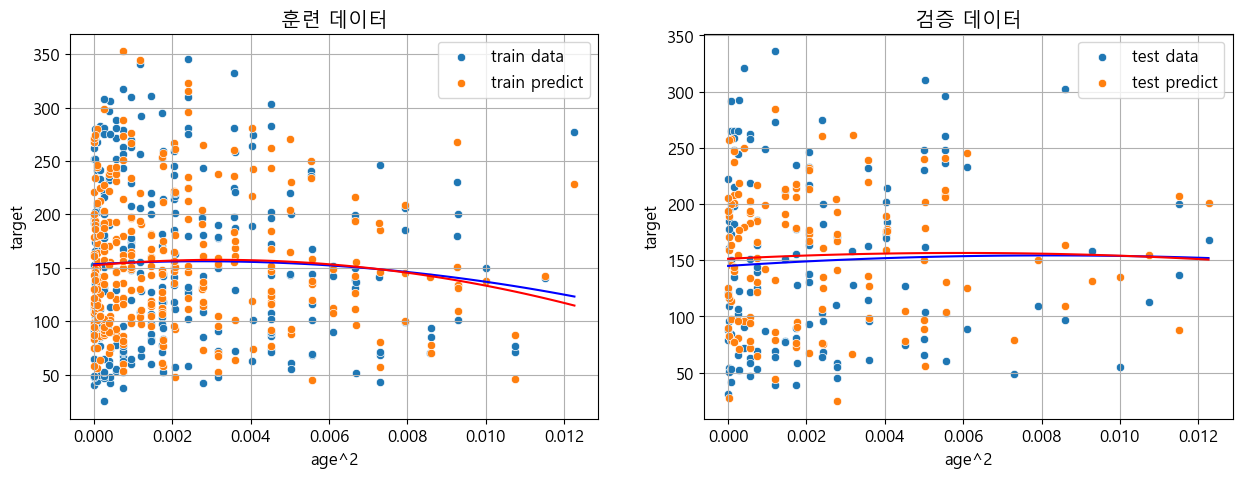

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 관측치 시각화
sb.scatterplot(x=x_train['age^2'], y=y_train['target'], label='train data', ax=ax1)

# 학습에 사용한 데이터에 추세선
x, y = helper.getTrend(x_train['age^2'], y_train['target'])
sb.lineplot(x=x, y=y, color='blue', ax=ax1)

# 학습 데이터에 따른 추정치
sb.scatterplot(x=x_train['age^2'], y=y_train_pred, label='train predict', ax=ax1)

# 추정치에 대한 추세선
x, y = helper.getTrend(x_train['age^2'], y_train_pred)
sb.lineplot(x=x, y=y, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

# 검증데이터 시각화
sb.scatterplot(x=x_test['age^2'], y=y_test['target'], label='test data', ax=ax2)

# 검증데이터의 추세선
x, y = helper.getTrend(x_test['age^2'], y_test['target'])
sb.lineplot(x=x, y=y, color='blue', ax=ax2)

# 검증데이터에 대한 추정치 시각화
sb.scatterplot(x=x_test['age^2'], y=y_test_pred, label='test predict', ax=ax2)

# 검증데이터 추정치에 대한 추세선
x, y = helper.getTrend(x_test['age^2'], y_test_pred)
sb.lineplot(x=x, y=y, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()